# Modules

In [ ]:
import csv
import numpy as np
import pandas as pd

In [ ]:
import math

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Import and mount to access drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


#Naive Bayes

## Data Pre-Processing & Visualisation

In [ ]:
# Create a data frame of data.csv
df = pd.read_csv('/gdrive/MyDrive/naive_bayes.csv', header = 0)

In [ ]:
# Sample
df

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes
5,Sunny,Cool,Normal,t,no
6,Overcast,Cool,Normal,t,yes
7,Rainy,Mild,High,f,no
8,Rainy,Cool,Normal,f,yes
9,Sunny,Mild,Normal,f,yes


In [ ]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Outlook   14 non-null     object
 1   Temp      14 non-null     object
 2   Humidity  14 non-null     object
 3   Windy     14 non-null     object
 4   Play      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [ ]:
# Description
df.describe()

,Outlook,Temp,Humidity,Windy,Play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Rainy,Mild,High,f,yes
freq,5,6,7,8,9


In [ ]:
# Amount of missing data
print("Percentage of missing values:")
print(((df.isna().sum()) / df.shape[0]) * 100)

Percentage of missing values:
Outlook     0.0
Temp        0.0
Humidity    0.0
Windy       0.0
Play        0.0
dtype: float64


In [ ]:
# Getting target and features
X = df.drop('Play', axis=1)
y = df['Play']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
X['Outlook'] = label_encoder.fit_transform(df['Outlook'])
X['Temp'] = label_encoder.fit_transform(df['Temp'])
X['Humidity'] = label_encoder.fit_transform(df['Humidity'])
X['Windy'] = label_encoder.fit_transform(df['Windy'])

In [ ]:
# Checking
X

,Outlook,Temp,Humidity,Windy
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


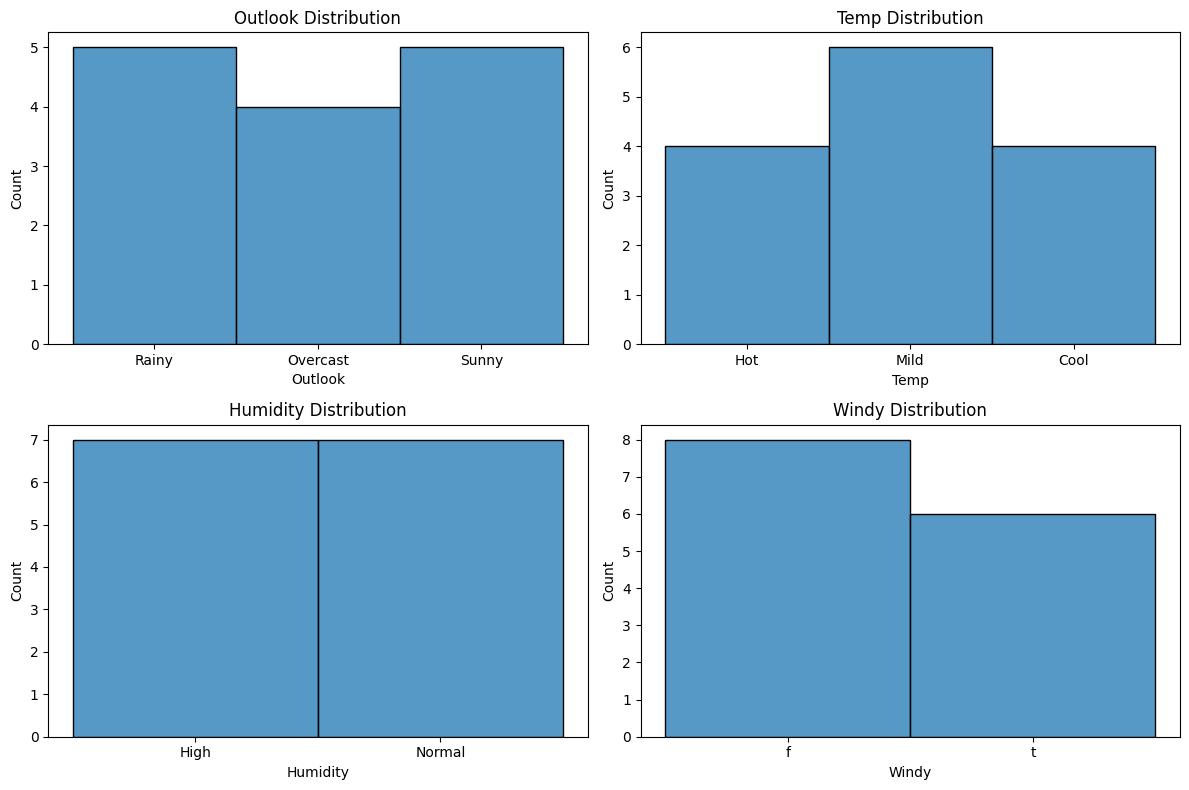

In [ ]:
# Data Distribution Plots
def plot_data_distribution(df):
    plt.figure(figsize=(12, 8))
    for i in range(len(X.columns)):
        plt.subplot(2, 2, i + 1)
        sns.histplot(df[df.columns[i]])
        plt.title(df.columns[i] + ' Distribution')
    plt.tight_layout()
    plt.show()

plot_data_distribution(df)

## TASK 0

In [ ]:
# train-test Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.14,
                                                      random_state = 42)

In [ ]:
# Checking
print(len(X_train), len(X_test))

12 2


## TASK 1

In [ ]:
# Calculation of prior probabilities
yes = 0
no = 0
for i in y_train:
  if i == 'yes':
    yes += 1
  else:
    no += 1

p_yes = yes / (yes + no)
p_no = no / (yes + no)

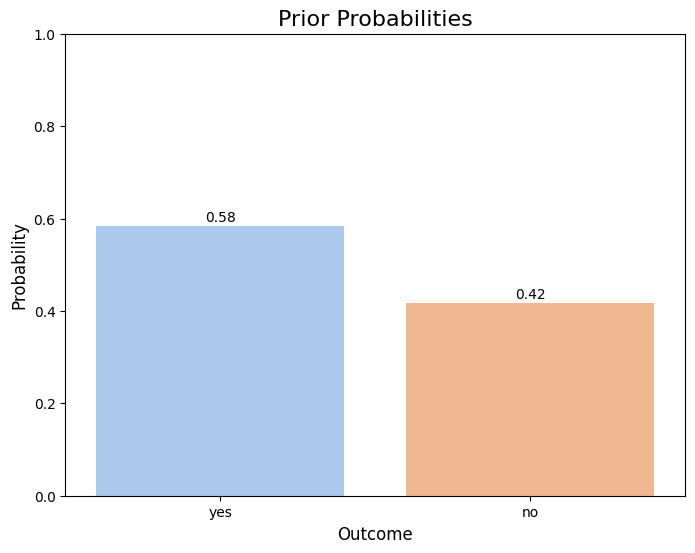

In [ ]:
plt.figure(figsize = (8, 6))
outcomes = ['yes', 'no']
probabilities = [p_yes, p_no]

sns.barplot(x = outcomes, y = probabilities, palette='pastel')
plt.title('Prior Probabilities', fontsize = 16)
plt.xlabel('Outcome', fontsize = 12)
plt.ylabel('Probability', fontsize = 12)

# Adding probability values on top of bars
for i in range(len(outcomes)):
    plt.text(i, probabilities[i] + 0.01, f"{probabilities[i]:.2f}",
             ha = 'center', fontsize = 10)

plt.ylim(0, 1)  # Setting y-axis limits
plt.show()

## TASK 2

In [ ]:
# For this task I will first split the dataframe
# into two the yes one and the no one
yep = []
nah = []
for i in range(len(y_train)):
  if y_train.iloc[i] == 'yes':
    yep.append(i)
  else:
    nah.append(i)

X_yes = X_train.iloc[yep]
X_no = X_train.iloc[nah]

In [ ]:
likelihood_yes = []

In [ ]:
# Making individual list for each column
# then append it to likelihood
for col in X_yes.columns:
  diff_values = X[col].unique()
  li = [0] * len(diff_values)
  for val in X_yes[col]:
    li[val] += 1
  li = [x / len(X_yes[col]) for x in li]
  likelihood_yes.append(li)

In [ ]:
likelihood_no = []

In [ ]:
# Making individual list for each column
# then append it to likelihood
for col in X_no.columns:
  diff_values = X[col].unique()
  li = [0] * len(diff_values)
  for val in X_no[col]:
    li[val] += 1
  li = [x / len(X_no[col]) for x in li]
  likelihood_no.append(li)

In [ ]:
df_1 = pd.DataFrame({ 'Outlook' : ['Overcast', 'Rainy', 'Sunny']
                     , 'P(yes)' : likelihood_yes[0]
                      , 'p(no)' : likelihood_no[0] })

df_2 = pd.DataFrame({    'Temp' : ['Cool', 'Hot', 'Mild']
                     , 'P(yes)' : likelihood_yes[1]
                      , 'p(no)' : likelihood_no[1] })

df_3 = pd.DataFrame({'Humidity' : ['High', 'Normal']
                     , 'P(yes)' : likelihood_yes[2]
                      , 'p(no)' : likelihood_no[2] })

df_4 = pd.DataFrame({   'Windy' : ['f', 't']
                     , 'P(yes)' : likelihood_yes[3]
                      , 'p(no)' : likelihood_no[3] })

In [ ]:
# Concatenating DataFrames horizontally
result = pd.concat([df_1, df_2, df_3, df_4], axis=1)

# Displaying the result
result.style.hide()

Outlook,P(yes),p(no),Temp,P(yes),p(no),Humidity,P(yes),p(no),Windy,P(yes),p(no)
Overcast,0.428571,0.000000,Cool,0.428571,0.200000,High,0.285714,0.800000,f,0.714286,0.400000
Rainy,0.285714,0.600000,Hot,0.285714,0.400000,Normal,0.714286,0.200000,t,0.285714,0.600000
Sunny,0.285714,0.400000,Mild,0.285714,0.400000,nan,nan,nan,nan,nan,nan


##TASK 3

In [ ]:
# To array conversion
X_test = X_test.to_numpy()
i , j = X_test.shape

In [ ]:
p1_yes = p_yes
p1_no = p_no

for col in range(j):
  p1_yes *= likelihood_yes[col][X_test[0][col]]
  p1_no *= likelihood_no[col][X_test[0][col]]

In [ ]:
print('For yes : ', p1_yes)
print('For no : ', p1_no)

For yes :  0.024295432458697763
For no :  0.005333333333333335


In [ ]:
p2_yes = p_yes
p2_no = p_no

for col in range(j):
  p2_yes *= likelihood_yes[col][X_test[1][col]]
  p2_no *= likelihood_no[col][X_test[1][col]]

In [ ]:
print('For yes : ', p2_yes)
print('For no : ', p2_no)

For yes :  0.005830903790087463
For no :  0.0


##TASK 4

In [ ]:
# Making predictions
print('For case 1')
if(p2_yes > p2_no):
  print('Playing')
else:
  print('Not Plating')

For case 1
Playing


In [ ]:
# Making predictions
print('For case 2')
if(p2_yes > p2_no):
  print('Playing')
else:
  print('Not Plating')

For case 2
Playing


##TASK 5

In [ ]:
# Laplace Smoothing
# Considering alpha  = 0.01
alpha = 0.01
# No of features k
k = None

In [ ]:
likelihood_yes = []

In [ ]:
# Making individual list for each column
# then append it to likelihood
for col in X_yes.columns:
  diff_values = X[col].unique()
  k = len(diff_values)
  li = [0] * len(diff_values)
  for val in X_yes[col]:
    li[val] += 1
  li = [(x + alpha) / (len(X_yes[col]) +
          (k * alpha)) for x in li]
  likelihood_yes.append(li)

In [ ]:
likelihood_no = []

In [ ]:
# Making individual list for each column
# then append it to likelihood
for col in X_no.columns:
  diff_values = X[col].unique()
  k = len(diff_values)
  li = [0] * len(diff_values)
  for val in X_no[col]:
    li[val] += 1
  li = [(x + alpha) / (len(X_no[col]) +
          (k * alpha)) for x in li]
  likelihood_no.append(li)

In [ ]:
df_1 = pd.DataFrame({ 'Outlook' : ['Overcast', 'Rainy', 'Sunny']
                     , 'P(yes)' : likelihood_yes[0]
                      , 'p(no)' : likelihood_no[0] })

df_2 = pd.DataFrame({    'Temp' : ['Cool', 'Hot', 'Mild']
                     , 'P(yes)' : likelihood_yes[1]
                      , 'p(no)' : likelihood_no[1] })

df_3 = pd.DataFrame({'Humidity' : ['High', 'Normal']
                     , 'P(yes)' : likelihood_yes[2]
                      , 'p(no)' : likelihood_no[2] })

df_4 = pd.DataFrame({   'Windy' : ['f', 't']
                     , 'P(yes)' : likelihood_yes[3]
                      , 'p(no)' : likelihood_no[3] })

In [ ]:
# Concatenating DataFrames horizontally
result = pd.concat([df_1, df_2, df_3, df_4], axis=1)

# Displaying the result
result.style.hide()

Outlook,P(yes),p(no),Temp,P(yes),p(no),Humidity,P(yes),p(no),Windy,P(yes),p(no)
Overcast,0.428165,0.001988,Cool,0.428165,0.200795,High,0.286325,0.798805,f,0.713675,0.400398
Rainy,0.285917,0.598410,Hot,0.285917,0.399602,Normal,0.713675,0.201195,t,0.286325,0.599602
Sunny,0.285917,0.399602,Mild,0.285917,0.399602,nan,nan,nan,nan,nan,nan


In [ ]:
p1_yes = p_yes
p1_no = p_no

for col in range(j):
  p1_yes *= likelihood_yes[col][X_test[0][col]]
  p1_no *= likelihood_no[col][X_test[0][col]]

In [ ]:
print('For yes : ', p1_yes)
print('For no : ', p1_no)

For yes :  0.02428843241892867
For no :  0.005359877943368312


In [ ]:
p2_yes = p_yes
p2_no = p_no

for col in range(j):
  p2_yes *= likelihood_yes[col][X_test[1][col]]
  p2_no *= likelihood_no[col][X_test[1][col]]

In [ ]:
print('For yes : ', p2_yes)
print('For no : ', p2_no)

For yes :  0.005854456555063937
For no :  0.00015854490113897748


In [ ]:
y_pred = []

In [ ]:
# Making predictions
print('For case 1')
if(p1_yes > p1_no):
  print('Playing')
  y_pred.append('yes')
else:
  print('Not Playing')
  y_pred.append('no')

For case 1
Playing


In [ ]:
# Making predictions
print('For case 2')
if(p2_yes > p2_no):
  print('Playing')
  y_pred.append('yes')
else:
  print('Not Playing')
  y_pred.append('no')

For case 2
Playing


In [ ]:
accuracy_score(y_test, y_pred)

1.0